In [1]:
import sys
sys.path.insert(1, '../src')
import preprocessing as pp

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
congestion_data = np.load('../data/1/xbar_congestion.npz')
instances, nets, cells = pp.load_data()
instances, xbst, ybst = pp.assign_demand_congestion_capacity(instances, congestion_data)
instances = pp.compute_features(instances, cells, xbst, ybst)
output_file = 'preprocessed_data.csv'
pp.save_preprocessed_data(instances, output_file)

In [3]:
congestion = congestion_data['demand'] - congestion_data['capacity']

In [4]:
instances

,name,id,xloc,yloc,cell,orient,routing_demand,congestion,capacity,GRC_Index,pin_count,pin_total
0,clk_gate_out_reg/latch,0,41984,44544,23,0,20.0,-8.0,28.0,"(29, 27)",4,12
1,clk_gate_out_reg_0/latch,1,41984,47616,23,6,23.0,-5.0,28.0,"(31, 27)",4,8
2,clk_gate_out_reg_1/latch,2,44160,44544,23,0,23.0,-10.0,33.0,"(29, 28)",4,10
3,clk_gate_out_reg_2/latch,3,44160,47616,23,0,22.0,-11.0,33.0,"(31, 28)",4,8
4,clk_gate_out_reg_3/latch,4,46336,47616,23,0,21.0,-2.0,23.0,"(31, 29)",4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3947,U4123,3947,21888,53760,42,4,31.0,0.0,31.0,"(35, 13)",3,12
3948,U4125,3948,33664,66048,42,0,30.0,0.0,30.0,"(43, 21)",3,16
3949,U4128,3949,23296,66048,34,0,27.0,-2.0,29.0,"(43, 14)",2,17
3950,ZCTSBUF_205_132,3950,40576,44544,11,0,28.0,-5.0,33.0,"(29, 26)",2,12


In [5]:
indexcongestion = instances.groupby(instances['GRC_Index'])['congestion'].mean()

xes = indexcongestion.index.str[0]
yes = indexcongestion.index.str[1]
vals = indexcongestion.values

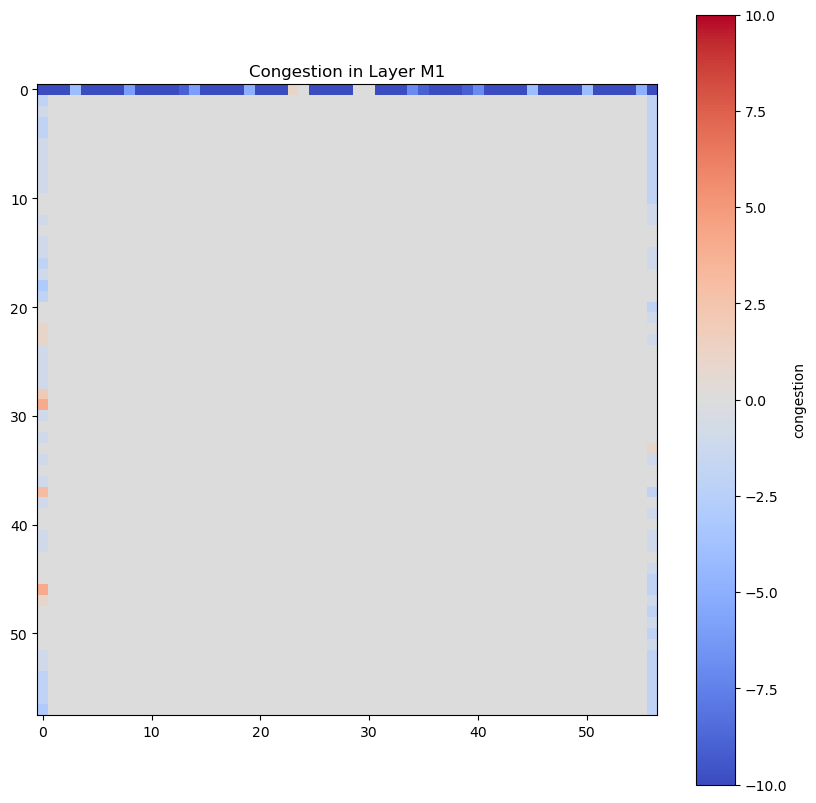

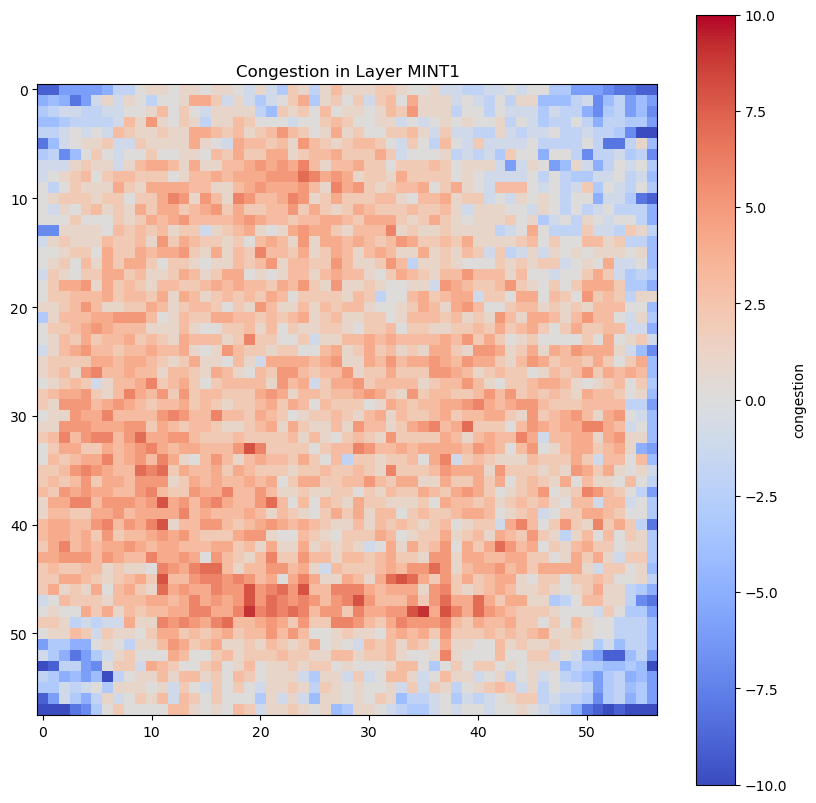

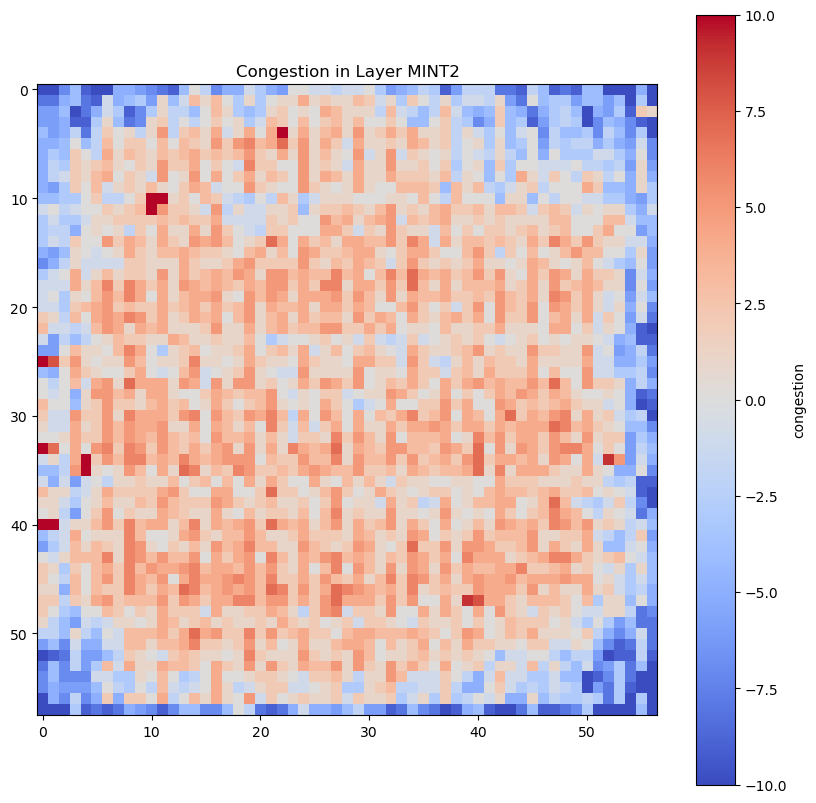

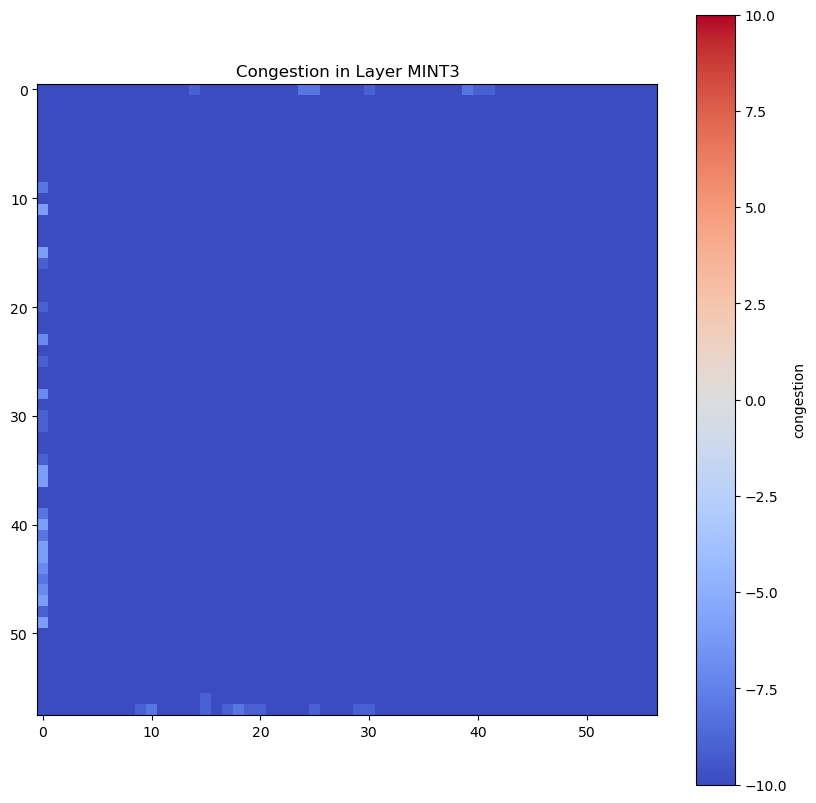

In [6]:
min_congestion = -10
max_congestion = 10

norm = mcolors.Normalize(vmin=min_congestion, vmax=max_congestion)
for i in range(4):
    plt.figure(figsize=(10, 10))
    heatmap = plt.imshow(congestion[i], cmap = 'coolwarm', norm=norm, interpolation='nearest')
    colorbar = plt.colorbar(heatmap, label='congestion')
    plt.title('Congestion in Layer ' + congestion_data['layerList'][i])
    plt.show()

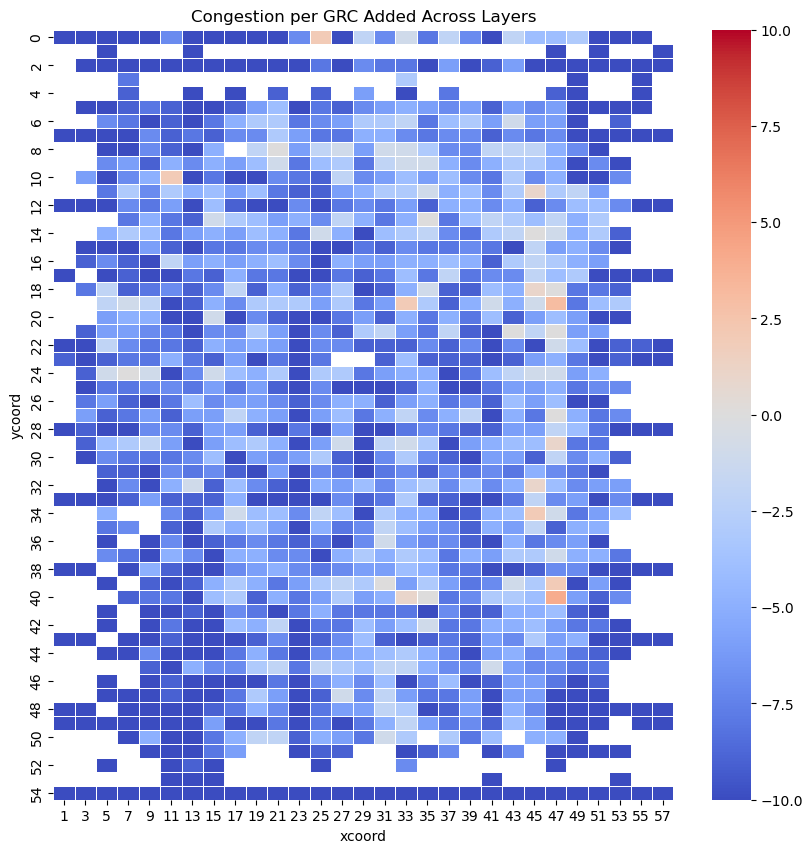

In [10]:
d = {'xcoord': list(xes),
'ycoord': list(yes),
'congestion': list(vals)}
df = pd.DataFrame(d)

plt.figure(figsize=(10, 10))
plt.title('Congestion per GRC Added Across Layers')
heatmap_data = df.pivot_table(index='ycoord', columns='xcoord', values='congestion', aggfunc='mean')
sns.heatmap(heatmap_data, vmin = min_congestion, vmax = max_congestion, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.savefig("heatmap.png")